MILESTONE - 1

In [38]:
# ===============================================
# Flight Delay EDA (Updated for flights_sample_3m.csv)
# ===============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [28]:
# -----------------------------
# 1. Load Dataset
# -----------------------------
df = pd.read_csv("flights_sample_3m.csv")
print(" Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()

 Dataset Loaded Successfully!
Shape: (1403471, 32)


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [13]:
# -----------------------------
# 2. Data Cleaning
# -----------------------------
# Convert FL_DATE to datetime
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce')

# Handle missing numeric values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Handle categorical missing values
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna('Unknown')

# Drop duplicates
df.drop_duplicates(inplace=True)

print("\n After Cleaning:")
print(df.info())



 After Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050012 entries, 0 to 1050011
Data columns (total 32 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   FL_DATE                  1050012 non-null  datetime64[ns]
 1   AIRLINE                  1050012 non-null  object        
 2   AIRLINE_DOT              1050012 non-null  object        
 3   AIRLINE_CODE             1050012 non-null  object        
 4   DOT_CODE                 1050012 non-null  int64         
 5   FL_NUMBER                1050012 non-null  int64         
 6   ORIGIN                   1050012 non-null  object        
 7   ORIGIN_CITY              1050012 non-null  object        
 8   DEST                     1050012 non-null  object        
 9   DEST_CITY                1050012 non-null  object        
 10  CRS_DEP_TIME             1050012 non-null  int64         
 11  DEP_TIME                 1050012 non-null  fl

In [36]:
print("Columns in dataset:")
print(df.columns)

Columns in dataset:
Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT'],
      dtype='object')


In [40]:

# 3. Extract Year, Month, Day, DayOfWeek from FL_DATE
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['Year'] = df['FL_DATE'].dt.year
df['Month'] = df['FL_DATE'].dt.month
df['DayofMonth'] = df['FL_DATE'].dt.day
df['DayOfWeek'] = df['FL_DATE'].dt.dayofweek + 1  # Monday=1, Sunday=7

print("\nAfter extracting Year, Month, DayofMonth, DayOfWeek:")
display(df[['FL_DATE','Year','Month','DayofMonth','DayOfWeek']].head())



After extracting Year, Month, DayofMonth, DayOfWeek:


,FL_DATE,Year,Month,DayofMonth,DayOfWeek
0,2019-01-09,2019,1,9,3
1,2022-11-19,2022,11,19,6
2,2022-07-22,2022,7,22,5
3,2023-03-06,2023,3,6,1
4,2020-02-23,2020,2,23,7


In [41]:
# 4. Convert HHMM times to hours
def convert_to_hour_min(time):
    if pd.isna(time):
        return np.nan
    try:
        time = int(time)
        hours = time // 100
        minutes = time % 100
        return hours + minutes/60
    except:
        return np.nan

time_columns = ['CRS_DEP_TIME','CRS_ARR_TIME','DEP_TIME','ARR_TIME']
for col in time_columns:
    if col in df.columns:
        df[col+'_Hour'] = df[col].apply(convert_to_hour_min)

print("\nAfter converting times to hours:")
display(df[['CRS_DEP_TIME','CRS_DEP_TIME_Hour','CRS_ARR_TIME','CRS_ARR_TIME_Hour',
            'DEP_TIME','DEP_TIME_Hour','ARR_TIME','ARR_TIME_Hour']].head())



After converting times to hours:


,CRS_DEP_TIME,CRS_DEP_TIME_Hour,CRS_ARR_TIME,CRS_ARR_TIME_Hour,DEP_TIME,DEP_TIME_Hour,ARR_TIME,ARR_TIME_Hour
0,1155.0,11.916667,1501.0,15.016667,1151.0,11.850000,1447.0,14.783333
1,2120.0,21.333333,2315.0,23.250000,2114.0,21.233333,2310.0,23.166667
2,954.0,9.900000,1252.0,12.866667,1000.0,10.000000,1252.0,12.866667
3,1609.0,16.150000,1829.0,18.483333,1608.0,16.133333,1853.0,18.883333
4,1840.0,18.666667,2041.0,20.683333,1838.0,18.633333,2040.0,20.666667


In [47]:
# Delay columns
delay_cols = ['DELAY_DUE_CARRIER','DELAY_DUE_WEATHER','DELAY_DUE_NAS','DELAY_DUE_SECURITY','DELAY_DUE_LATE_AIRCRAFT']

# TotalDelay (vectorized sum)
df['TotalDelay'] = df[delay_cols].sum(axis=1)

# DelayReason (vectorized idxmax along columns)
# First, replace zeros with NaN temporarily to handle "NoDelay"
df_delay = df[delay_cols].replace(0, np.nan)
df['DelayReason'] = df_delay.idxmax(axis=1)

# Set 'NoDelay' where TotalDelay is 0
df.loc[df['TotalDelay'] == 0, 'DelayReason'] = 'NoDelay'
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,Year,Month,DayofMonth,DayOfWeek,CRS_DEP_TIME_Hour,CRS_ARR_TIME_Hour,DEP_TIME_Hour,ARR_TIME_Hour,TotalDelay,DelayReason
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,2019,1,9,3,11.916667,15.016667,11.850000,14.783333,0.0,NoDelay
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,2022,11,19,6,21.333333,23.250000,21.233333,23.166667,0.0,NoDelay
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,2022,7,22,5,9.900000,12.866667,10.000000,12.866667,0.0,NoDelay
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,2023,3,6,1,16.150000,18.483333,16.133333,18.883333,24.0,DELAY_DUE_NAS
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,2020,2,23,7,18.666667,20.683333,18.633333,20.666667,0.0,NoDelay


In [48]:
# 5. Drop the original delay columns (optional)
df_clean = df.drop(columns=delay_cols)

# 6. Count of unique Years, Months, Days of Week
num_years = df['Year'].nunique()
years_list = df['Year'].unique()

num_months = df['Month'].nunique()
months_list = df['Month'].unique()

num_days_of_week = df['DayOfWeek'].nunique()
days_list = df['DayOfWeek'].unique()

print(f"Number of Years: {num_years}, Years: {years_list}")
print(f"Number of Months: {num_months}, Months: {months_list}")
print(f"Number of Days of Week: {num_days_of_week}, Days: {days_list}")

Number of Years: 5, Years: [2019 2022 2023 2020 2021]
Number of Months: 12, Months: [ 1 11  7  3  2  6  8  4  5 12  9 10]
Number of Days of Week: 7, Days: [3 6 5 1 7 4 2]


In [70]:
df.to_csv("Cleaned_Flight_delay.csv", index=False)
print(" Cleaned Dataset Saved as Cleaned_Flight_delay.csv")

 Cleaned Dataset Saved as Cleaned_Flight_delay.csv


In [71]:
# -----------------------------
# 1. Reload Dataset
# -----------------------------
df = pd.read_csv("/content/Cleaned_Flight_delay.csv")
print(" Dataset Reloaded Successfully!")
print("Shape:", df.shape)
df.head()

 Dataset Reloaded Successfully!
Shape: (1403471, 44)


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DayofMonth,DayOfWeek,CRS_DEP_TIME_Hour,CRS_ARR_TIME_Hour,DEP_TIME_Hour,ARR_TIME_Hour,TotalDelay,DelayReason,Route,DoW
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,9,3,11.916667,15.016667,11.850000,14.783333,0.0,NoDelay,FLL_EWR,Wednesday
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,19,6,21.333333,23.250000,21.233333,23.166667,0.0,NoDelay,MSP_SEA,Saturday
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,22,5,9.900000,12.866667,10.000000,12.866667,0.0,NoDelay,DEN_MSP,Friday
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,6,1,16.150000,18.483333,16.133333,18.883333,24.0,DELAY_DUE_NAS,MSP_SFO,Monday
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,23,7,18.666667,20.683333,18.633333,20.666667,0.0,NoDelay,MCO_DFW,Sunday


In [74]:
print("Columns in dataset:")
print(df.columns)

Columns in dataset:
Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'CRS_DEP_TIME_Hour', 'CRS_ARR_TIME_Hour', 'DEP_TIME_Hour',
       'ARR_TIME_Hour', 'TotalDelay', 'DelayReason', 'Route', 'DoW', '_Hour'],
      dtype='object')


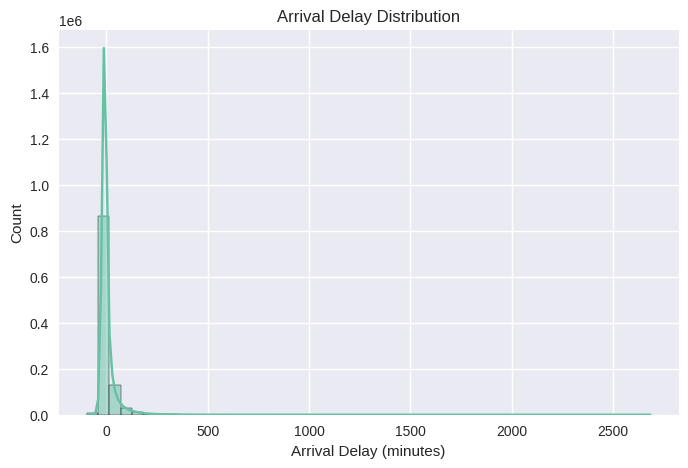

In [15]:
# -----------------------------
# 7. Exploratory Data Analysis (EDA)
# -----------------------------
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

# Distribution of delays
plt.figure(figsize=(8,5))
sns.histplot(df['ARR_DELAY'], bins=50, kde=True)
plt.title('Arrival Delay Distribution')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Count')
plt.show()

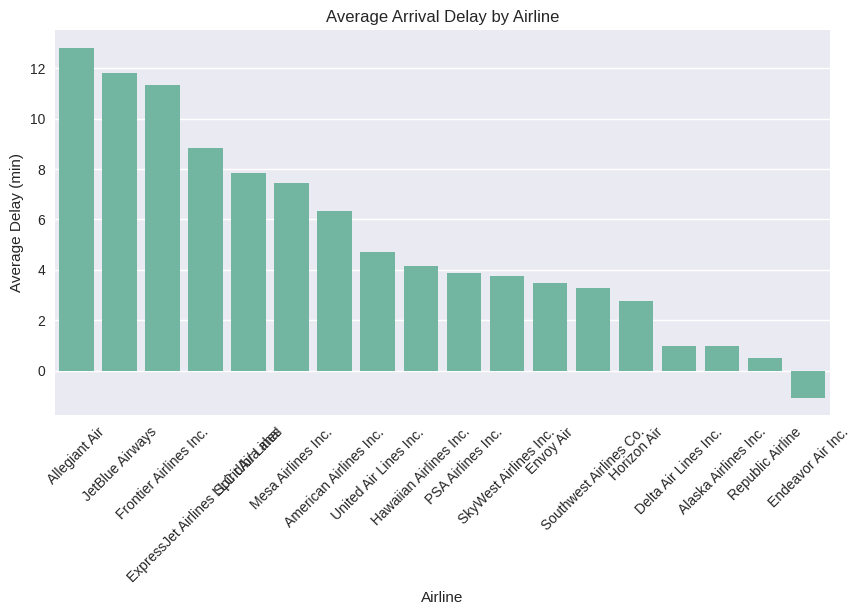

In [17]:
# Average delay by airline
plt.figure(figsize=(10,5))
airline_delay = df.groupby('AIRLINE')['ARR_DELAY'].mean().sort_values(ascending=False)
sns.barplot(x=airline_delay.index, y=airline_delay.values)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (min)')
plt.xticks(rotation=45)
plt.show()

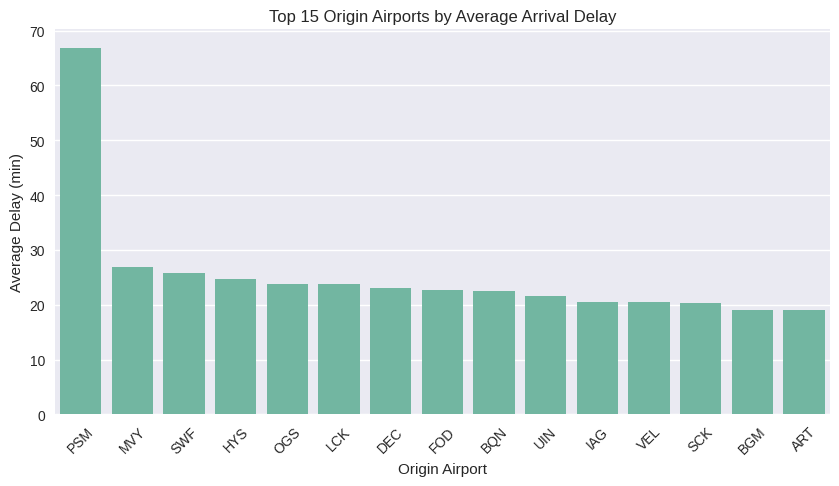

In [18]:
# Average delay by origin airport
plt.figure(figsize=(10,5))
origin_delay = df.groupby('ORIGIN')['ARR_DELAY'].mean().sort_values(ascending=False)[:15]
sns.barplot(x=origin_delay.index, y=origin_delay.values)
plt.title('Top 15 Origin Airports by Average Arrival Delay')
plt.xlabel('Origin Airport')
plt.ylabel('Average Delay (min)')
plt.xticks(rotation=45)
plt.show()

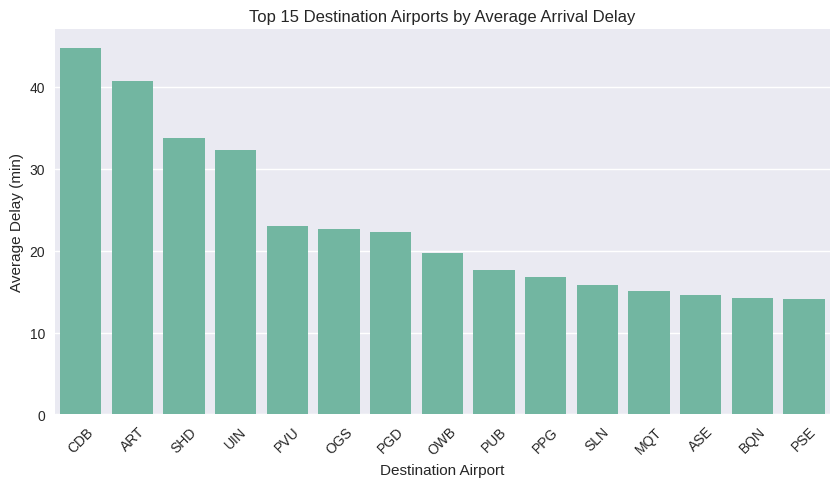

In [19]:
# Average delay by destination airport
plt.figure(figsize=(10,5))
dest_delay = df.groupby('DEST')['ARR_DELAY'].mean().sort_values(ascending=False)[:15]
sns.barplot(x=dest_delay.index, y=dest_delay.values)
plt.title('Top 15 Destination Airports by Average Arrival Delay')
plt.xlabel('Destination Airport')
plt.ylabel('Average Delay (min)')
plt.xticks(rotation=45)
plt.show()

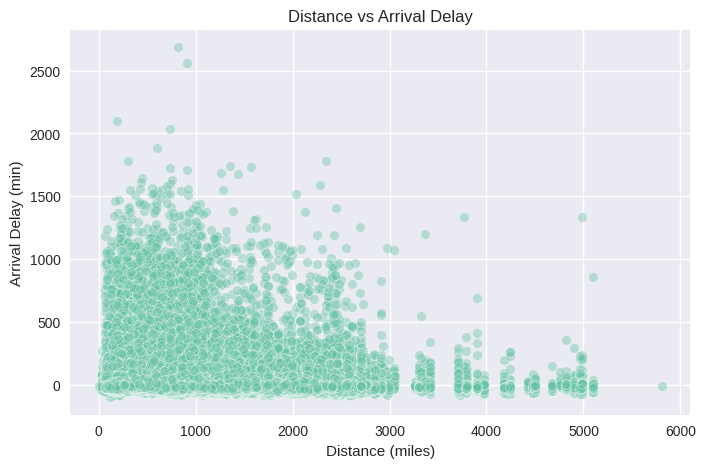

In [20]:
# Delay vs Distance
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='DISTANCE', y='ARR_DELAY', alpha=0.4)
plt.title('Distance vs Arrival Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Arrival Delay (min)')
plt.show()

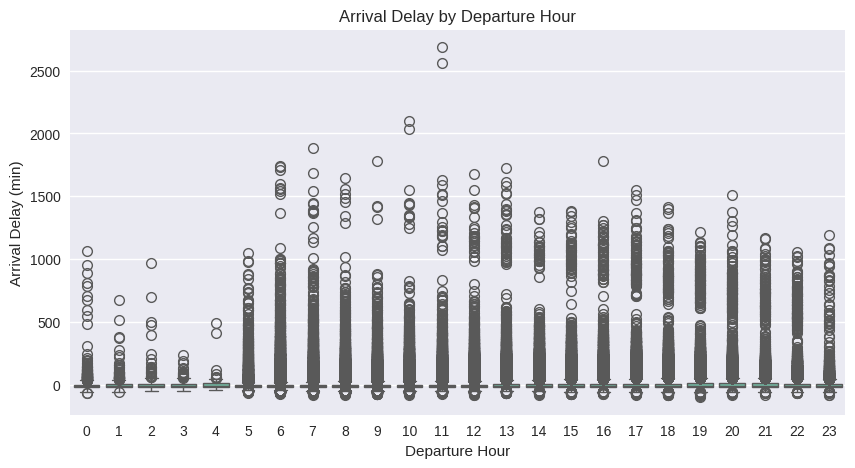

In [21]:

# Delay by Hour of Day
plt.figure(figsize=(10,5))
sns.boxplot(x='DEP_HOUR', y='ARR_DELAY', data=df)
plt.title('Arrival Delay by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Arrival Delay (min)')
plt.show()


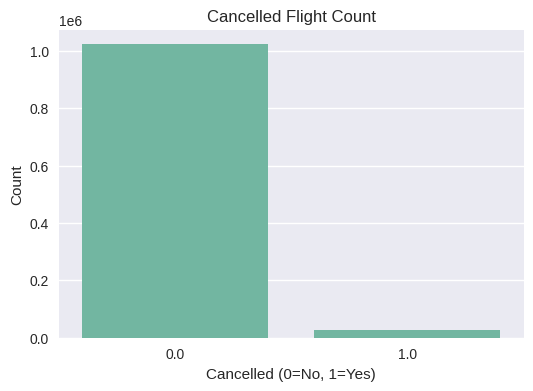

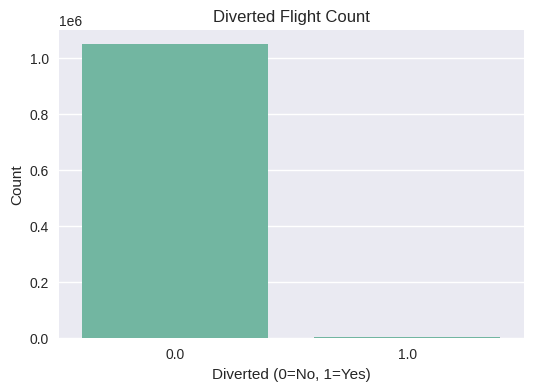

In [22]:

# Cancellation and Diversion Overview
plt.figure(figsize=(6,4))
sns.countplot(x='CANCELLED', data=df)
plt.title('Cancelled Flight Count')
plt.xlabel('Cancelled (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='DIVERTED', data=df)
plt.title('Diverted Flight Count')
plt.xlabel('Diverted (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

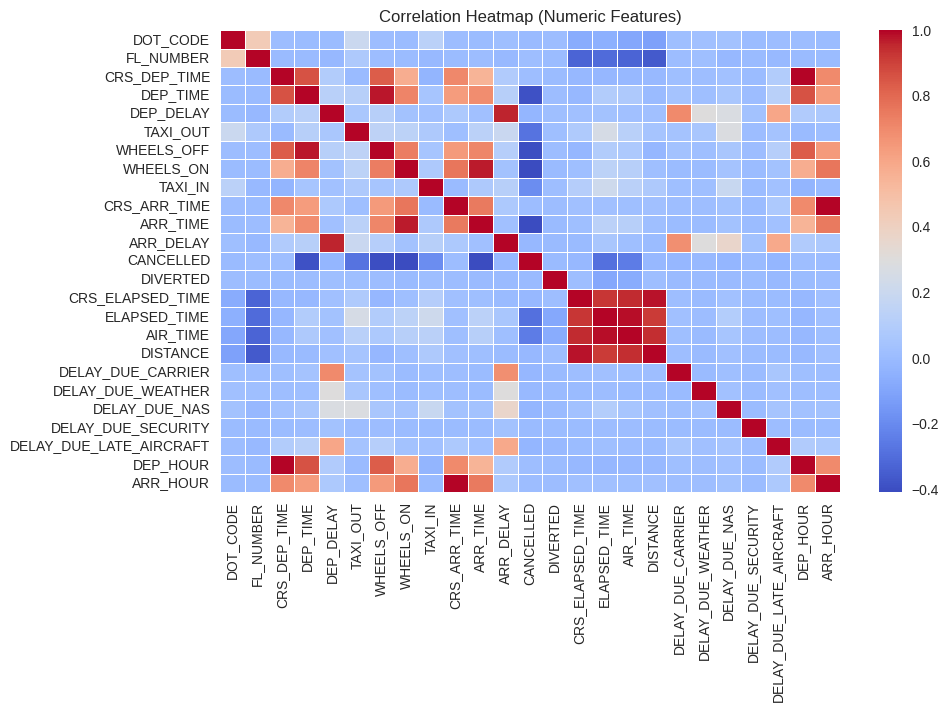

In [23]:
# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

MILESTONE - 2

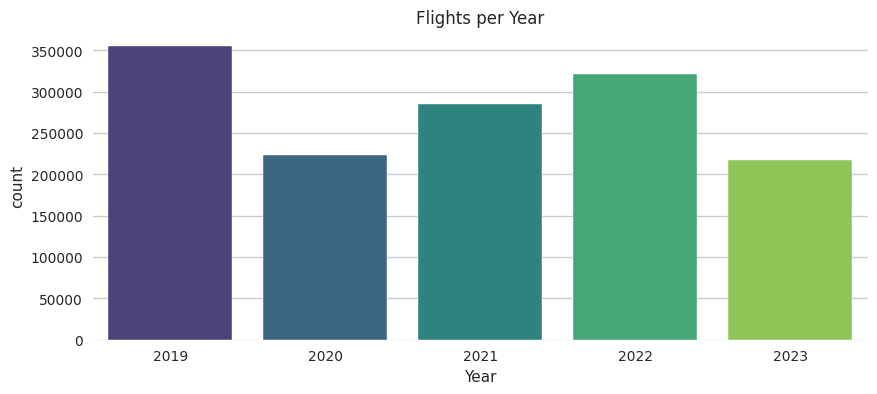

In [51]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x="Year", palette="viridis")
plt.title("Flights per Year")
plt.show()

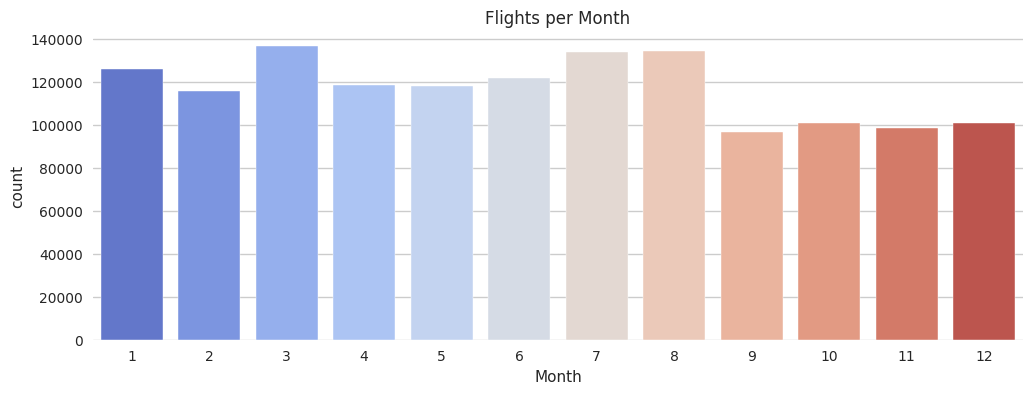

In [52]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x="Month", palette="coolwarm")
plt.title("Flights per Month")
plt.show()

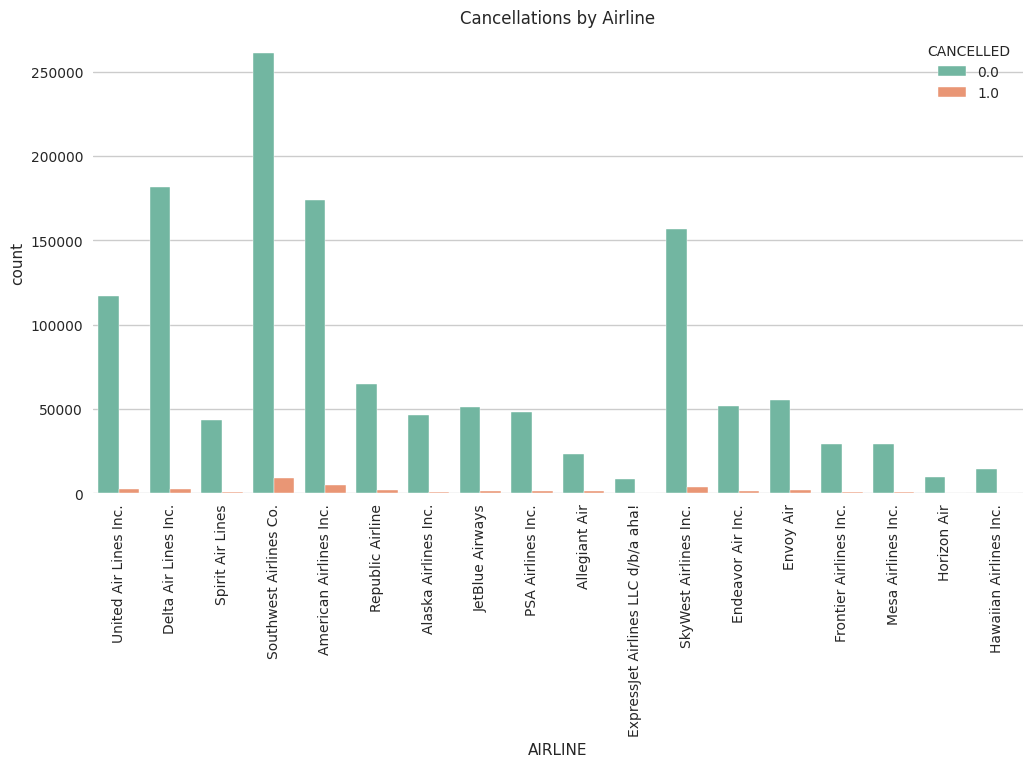

In [54]:
# Cancellations by Airline
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="AIRLINE", hue="CANCELLED", palette="Set2")
plt.title("Cancellations by Airline")
plt.xticks(rotation=90)
plt.show()

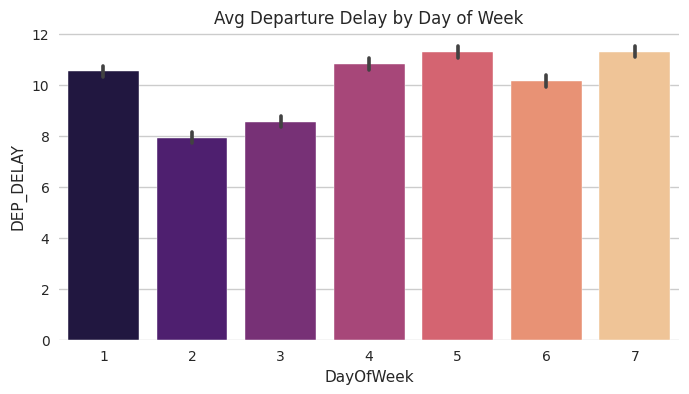

In [59]:
# Avg delay by day of week
plt.figure(figsize=(8,4))
sns.barplot(data=df, x="DayOfWeek", y="DEP_DELAY", estimator=np.mean, palette="magma")
plt.title("Avg Departure Delay by Day of Week")
plt.show()

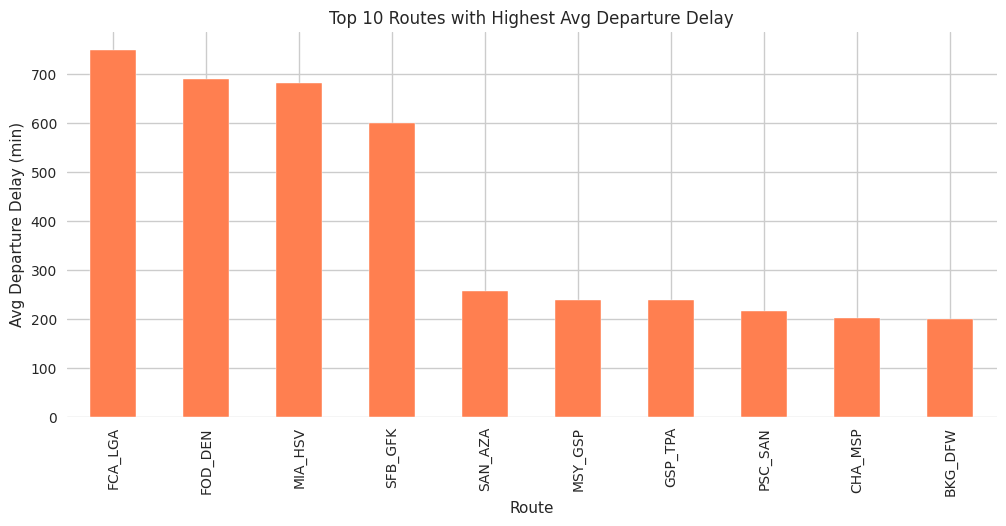

In [60]:
# Top 10 routes with highest avg delay
df["Route"] = df["ORIGIN"] + "_" + df["DEST"]
route_delays = df.groupby("Route")["DEP_DELAY"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
route_delays.plot(kind="bar", color="coral")
plt.title("Top 10 Routes with Highest Avg Departure Delay")
plt.ylabel("Avg Departure Delay (min)")
plt.show()

MILESTONE - 3

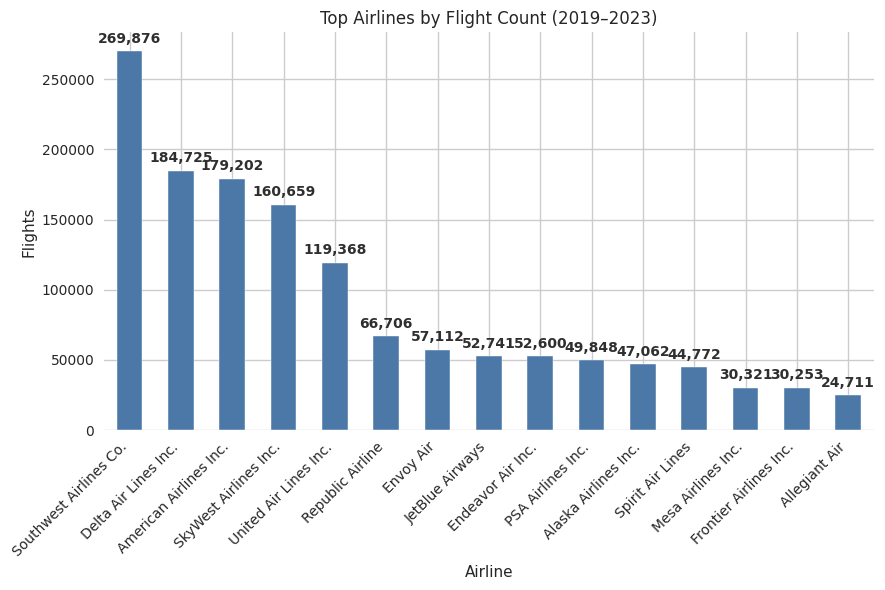

In [63]:
plt.figure(figsize=(9,6))
ax = (df.groupby('AIRLINE').size().sort_values(ascending=False).head(15)
      .plot(kind='bar', color='#4C78A8'))
ax.set_title('Top Airlines by Flight Count (2019–2023)')
ax.set_xlabel('Airline')
ax.set_ylabel('Flights')
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    h = p.get_height()
    ax.annotate(f'{int(h):,}',
                (p.get_x() + p.get_width()/2, h),
                ha='center', va='bottom',
                fontsize=10, fontweight='bold',
                xytext=(0,4), textcoords='offset points',
                color='#2f2f2f')
plt.tight_layout()
plt.show()

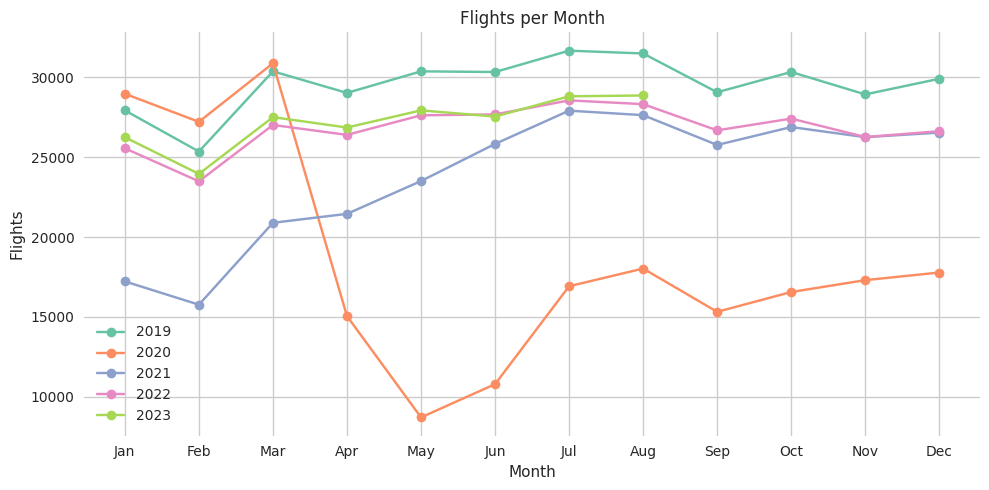

In [65]:
#Busiest Months
from calendar import month_abbr
month_order = list(range(1,13))
month_labels = [month_abbr[m] for m in month_order]

monthly = df.groupby(['Year','Month']).size().reset_index(name='Flights')
monthly['MonthLabel'] = monthly['Month'].map(dict(zip(month_order, month_labels)))
plt.figure(figsize=(10,5))
for y, g in monthly.groupby('Year'):
    plt.plot(g['Month'], g['Flights'], marker='o', label=str(y))
plt.title('Flights per Month')
plt.xlabel('Month')
plt.ylabel('Flights')
plt.xticks(month_order, month_labels)
plt.legend()
plt.tight_layout()
plt.show()

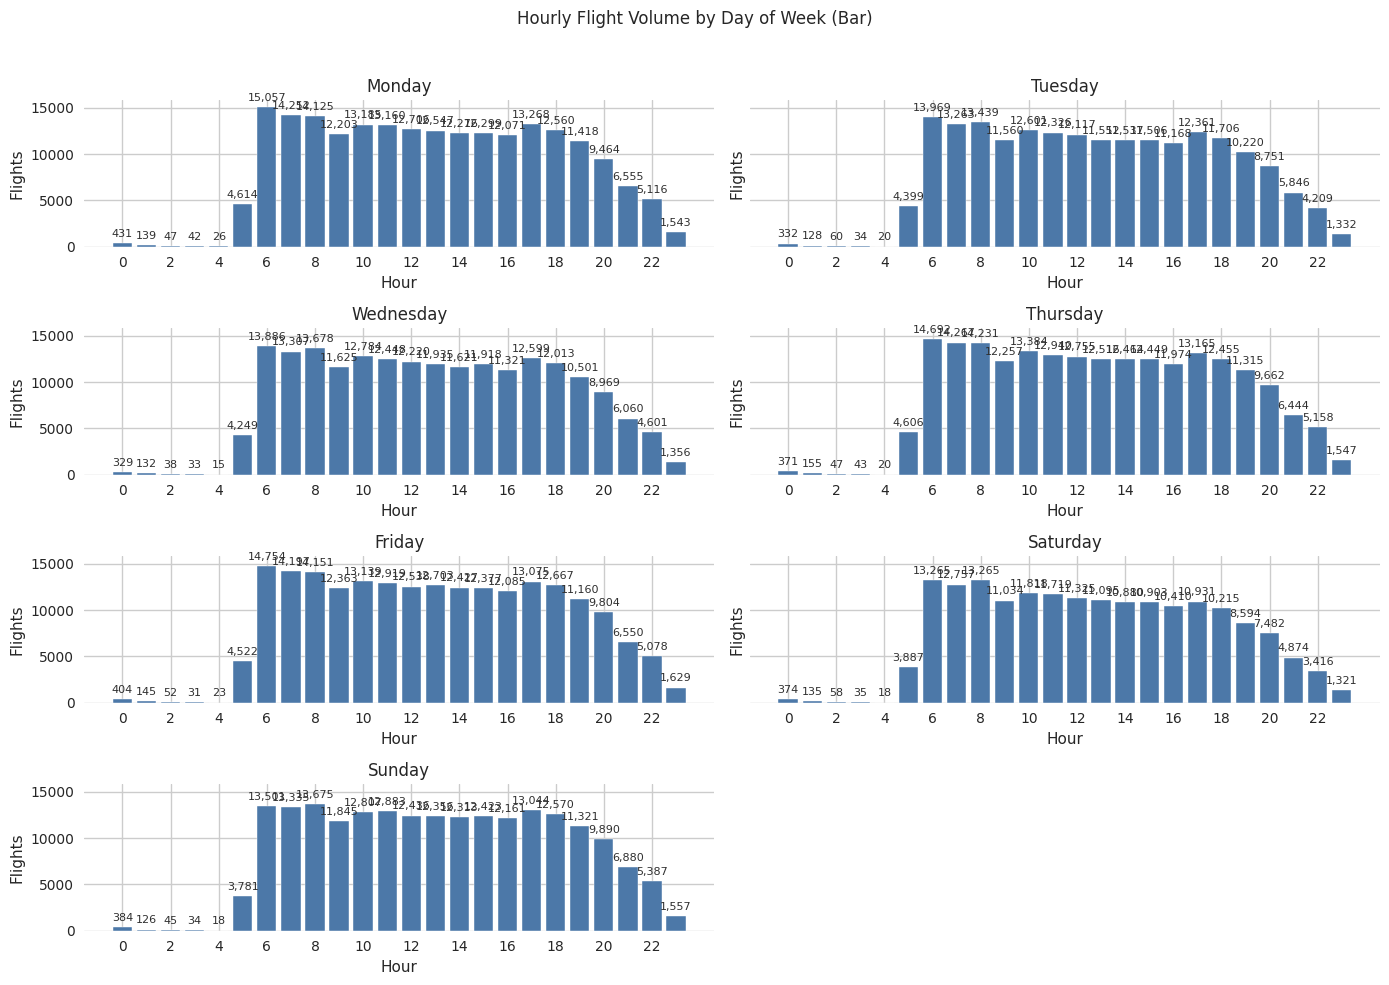

In [73]:
import matplotlib.pyplot as plt

# 1. Day-of-week order (names)
dow_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

# 2. Use the CRS_DEP_TIME_Hour column as the hour for plotting
df['_Hour'] = df['CRS_DEP_TIME_Hour'].fillna(0).astype(int)

# 3. Create 4x2 subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 10), sharey=True)
axes = axes.flatten()

for i, dow in enumerate(dow_order):
    ax = axes[i]
    # Group flights by hour for the current day of week
    g = df[df['DoW'] == dow].groupby('_Hour').size()
    ax.bar(g.index, g.values, color='#4C78A8', width=0.8)
    ax.set_title(dow)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Flights')
    ax.set_xticks(range(0, 24, 2))

# Hide the unused 8th subplot (if any)
for j in range(len(dow_order), len(axes)):
    fig.delaxes(axes[j])

# 4. Add bar labels on each subplot
for i, dow in enumerate(dow_order):
    ax = axes[i]
    for p in ax.patches:
        h = p.get_height()
        if h > 0:
            ax.annotate(f'{int(h):,}',
                        (p.get_x() + p.get_width()/2, h),
                        ha='center', va='bottom', fontsize=8,
                        xytext=(0, 3), textcoords='offset points', color='#2f2f2f')

# 5. Super title and layout
fig.suptitle('Hourly Flight Volume by Day of Week (Bar)')
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


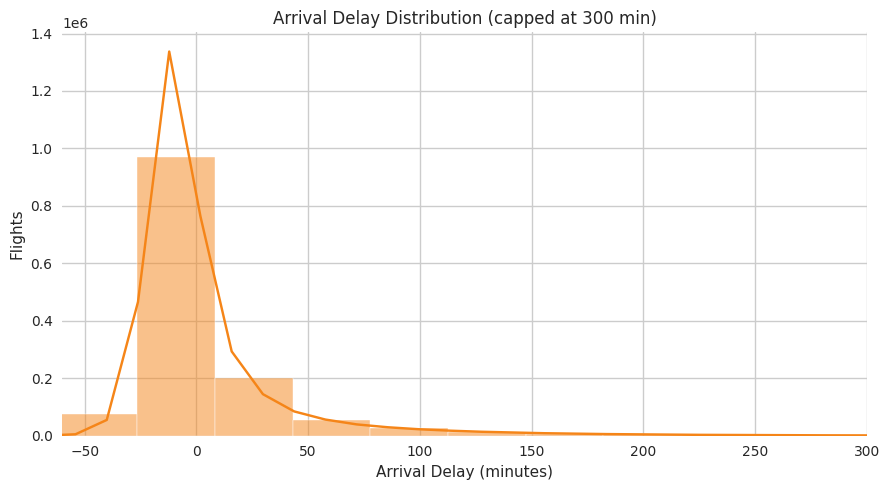

In [75]:
plt.figure(figsize=(9,5))
sns.histplot(df['ARR_DELAY'].dropna(), bins=80, kde=True, color='#F58518')
plt.xlim(-60, 300)
plt.title('Arrival Delay Distribution (capped at 300 min)')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Flights')
plt.tight_layout()
plt.show()


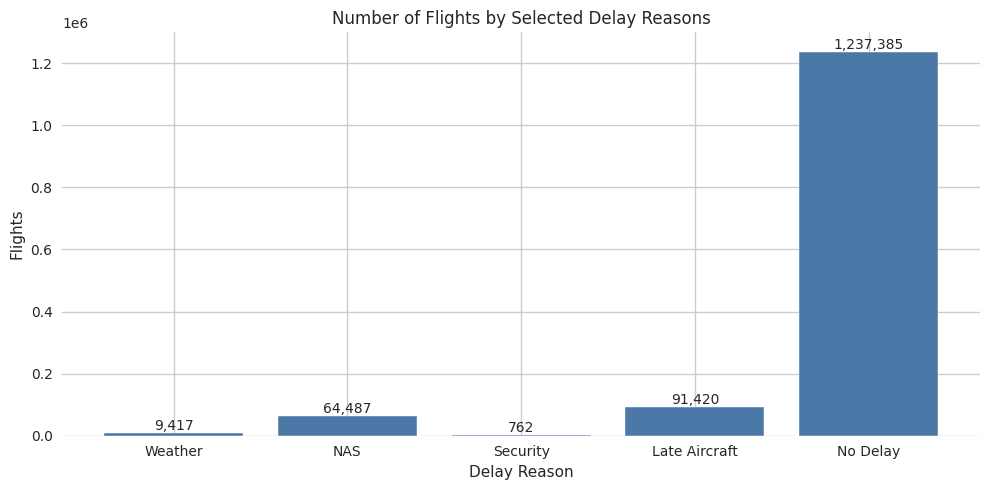

In [76]:
import matplotlib.pyplot as plt

# Make a copy to avoid modifying original
_df = df.copy()

# Map DelayReason values to simplified names
delay_map = {
    'DELAY_DUE_WEATHER': 'Weather',
    'DELAY_DUE_NAS': 'NAS',
    'DELAY_DUE_SECURITY': 'Security',
    'DELAY_DUE_LATE_AIRCRAFT': 'Late Aircraft',
    'NoDelay': 'No Delay'
}

# Apply mapping
_df['DELAY_REASON_SIMPLE'] = _df['DelayReason'].map(delay_map)

# Fill any missing with 'No Delay'
_df['DELAY_REASON_SIMPLE'] = _df['DELAY_REASON_SIMPLE'].fillna('No Delay')

# Specify the five reasons to display
reasons = ['Weather','NAS','Security','Late Aircraft','No Delay']

# Count flights for the selected reasons only
counts = (_df[_df['DELAY_REASON_SIMPLE'].isin(reasons)]
          .groupby('DELAY_REASON_SIMPLE').size()
          .reindex(reasons, fill_value=0))

# Plot
plt.figure(figsize=(10,5))
plt.bar(reasons, counts.values, color='#4C78A8')
plt.title('Number of Flights by Selected Delay Reasons')
plt.xlabel('Delay Reason')
plt.ylabel('Flights')
plt.xticks(rotation=0)

# Add labels
for i, v in enumerate(counts.values):
    plt.text(i, v, f'{int(v):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


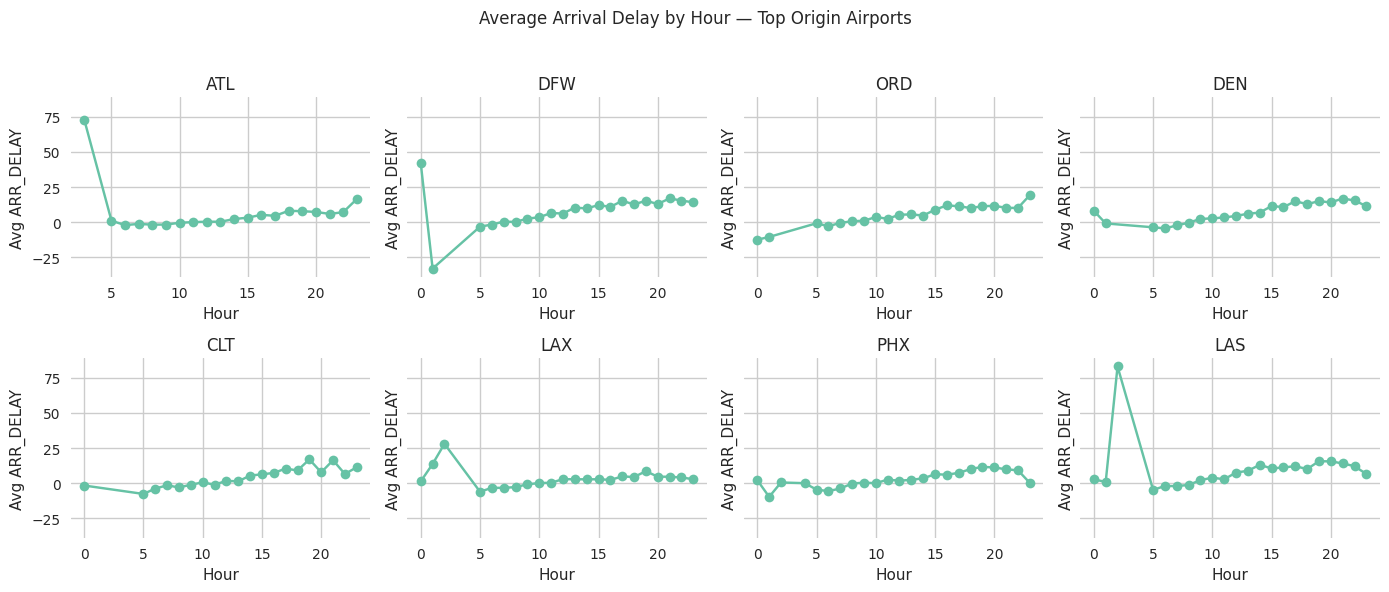

In [78]:
top_airports = _df['ORIGIN'].value_counts().head(8).index
sub = _df[_df['ORIGIN'].isin(top_airports)].copy()
sub['Hour'] = sub['CRS_DEP_TIME_Hour'].fillna(0).astype(int)

fig, axes = plt.subplots(2, 4, figsize=(14,6), sharey=True)
axes = axes.flatten()

for ax, ap in zip(axes, top_airports):
    g = sub[sub['ORIGIN'] == ap].groupby('Hour')['ARR_DELAY'].mean()
    ax.plot(g.index, g.values, marker='o')
    ax.set_title(ap)
    ax.set_xlabel('Hour')
    ax.set_ylabel('Avg ARR_DELAY')

plt.suptitle('Average Arrival Delay by Hour — Top Origin Airports')
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()


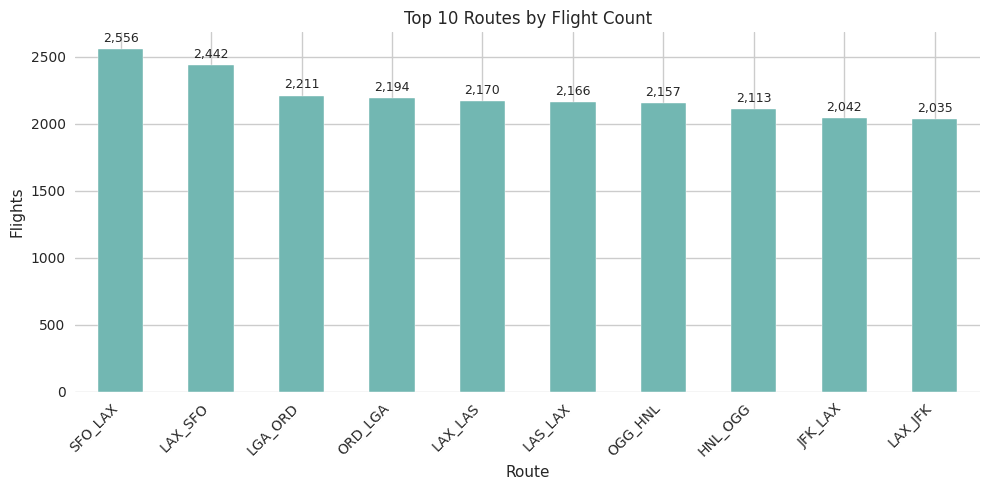

In [79]:
# Compute top 10 routes by flight count
route_counts =df['Route'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
ax = route_counts.plot(kind='bar', color='#72B7B2')
ax.set_title('Top 10 Routes by Flight Count')
ax.set_xlabel('Route')
ax.set_ylabel('Flights')
plt.xticks(rotation=45, ha='right')

# Optional: add value labels
for p, v in zip(ax.patches, route_counts.values):
    ax.annotate(f'{int(v):,}',
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9,
                xytext=(0,3), textcoords='offset points')

plt.tight_layout()
plt.show()

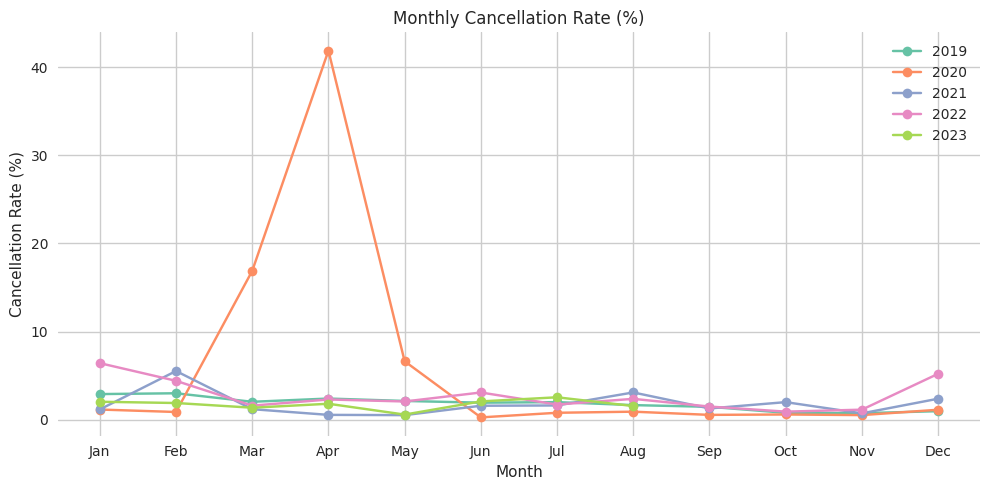

In [80]:
# Monthly cancellation rate (line)
df['CancelledFlag'] = (df['CANCELLED']==1).astype(int)
can_month = df.groupby(['Year','Month'])['CancelledFlag'].mean().reset_index()
can_month['MonthLabel'] = can_month['Month'].map(dict(zip(month_order, month_labels)))
plt.figure(figsize=(10,5))
for y, g in can_month.groupby('Year'):
    plt.plot(g['Month'], 100*g['CancelledFlag'], marker='o', label=str(y))
plt.title('Monthly Cancellation Rate (%)')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(month_order, month_labels)
plt.legend()
plt.tight_layout()
plt.show()

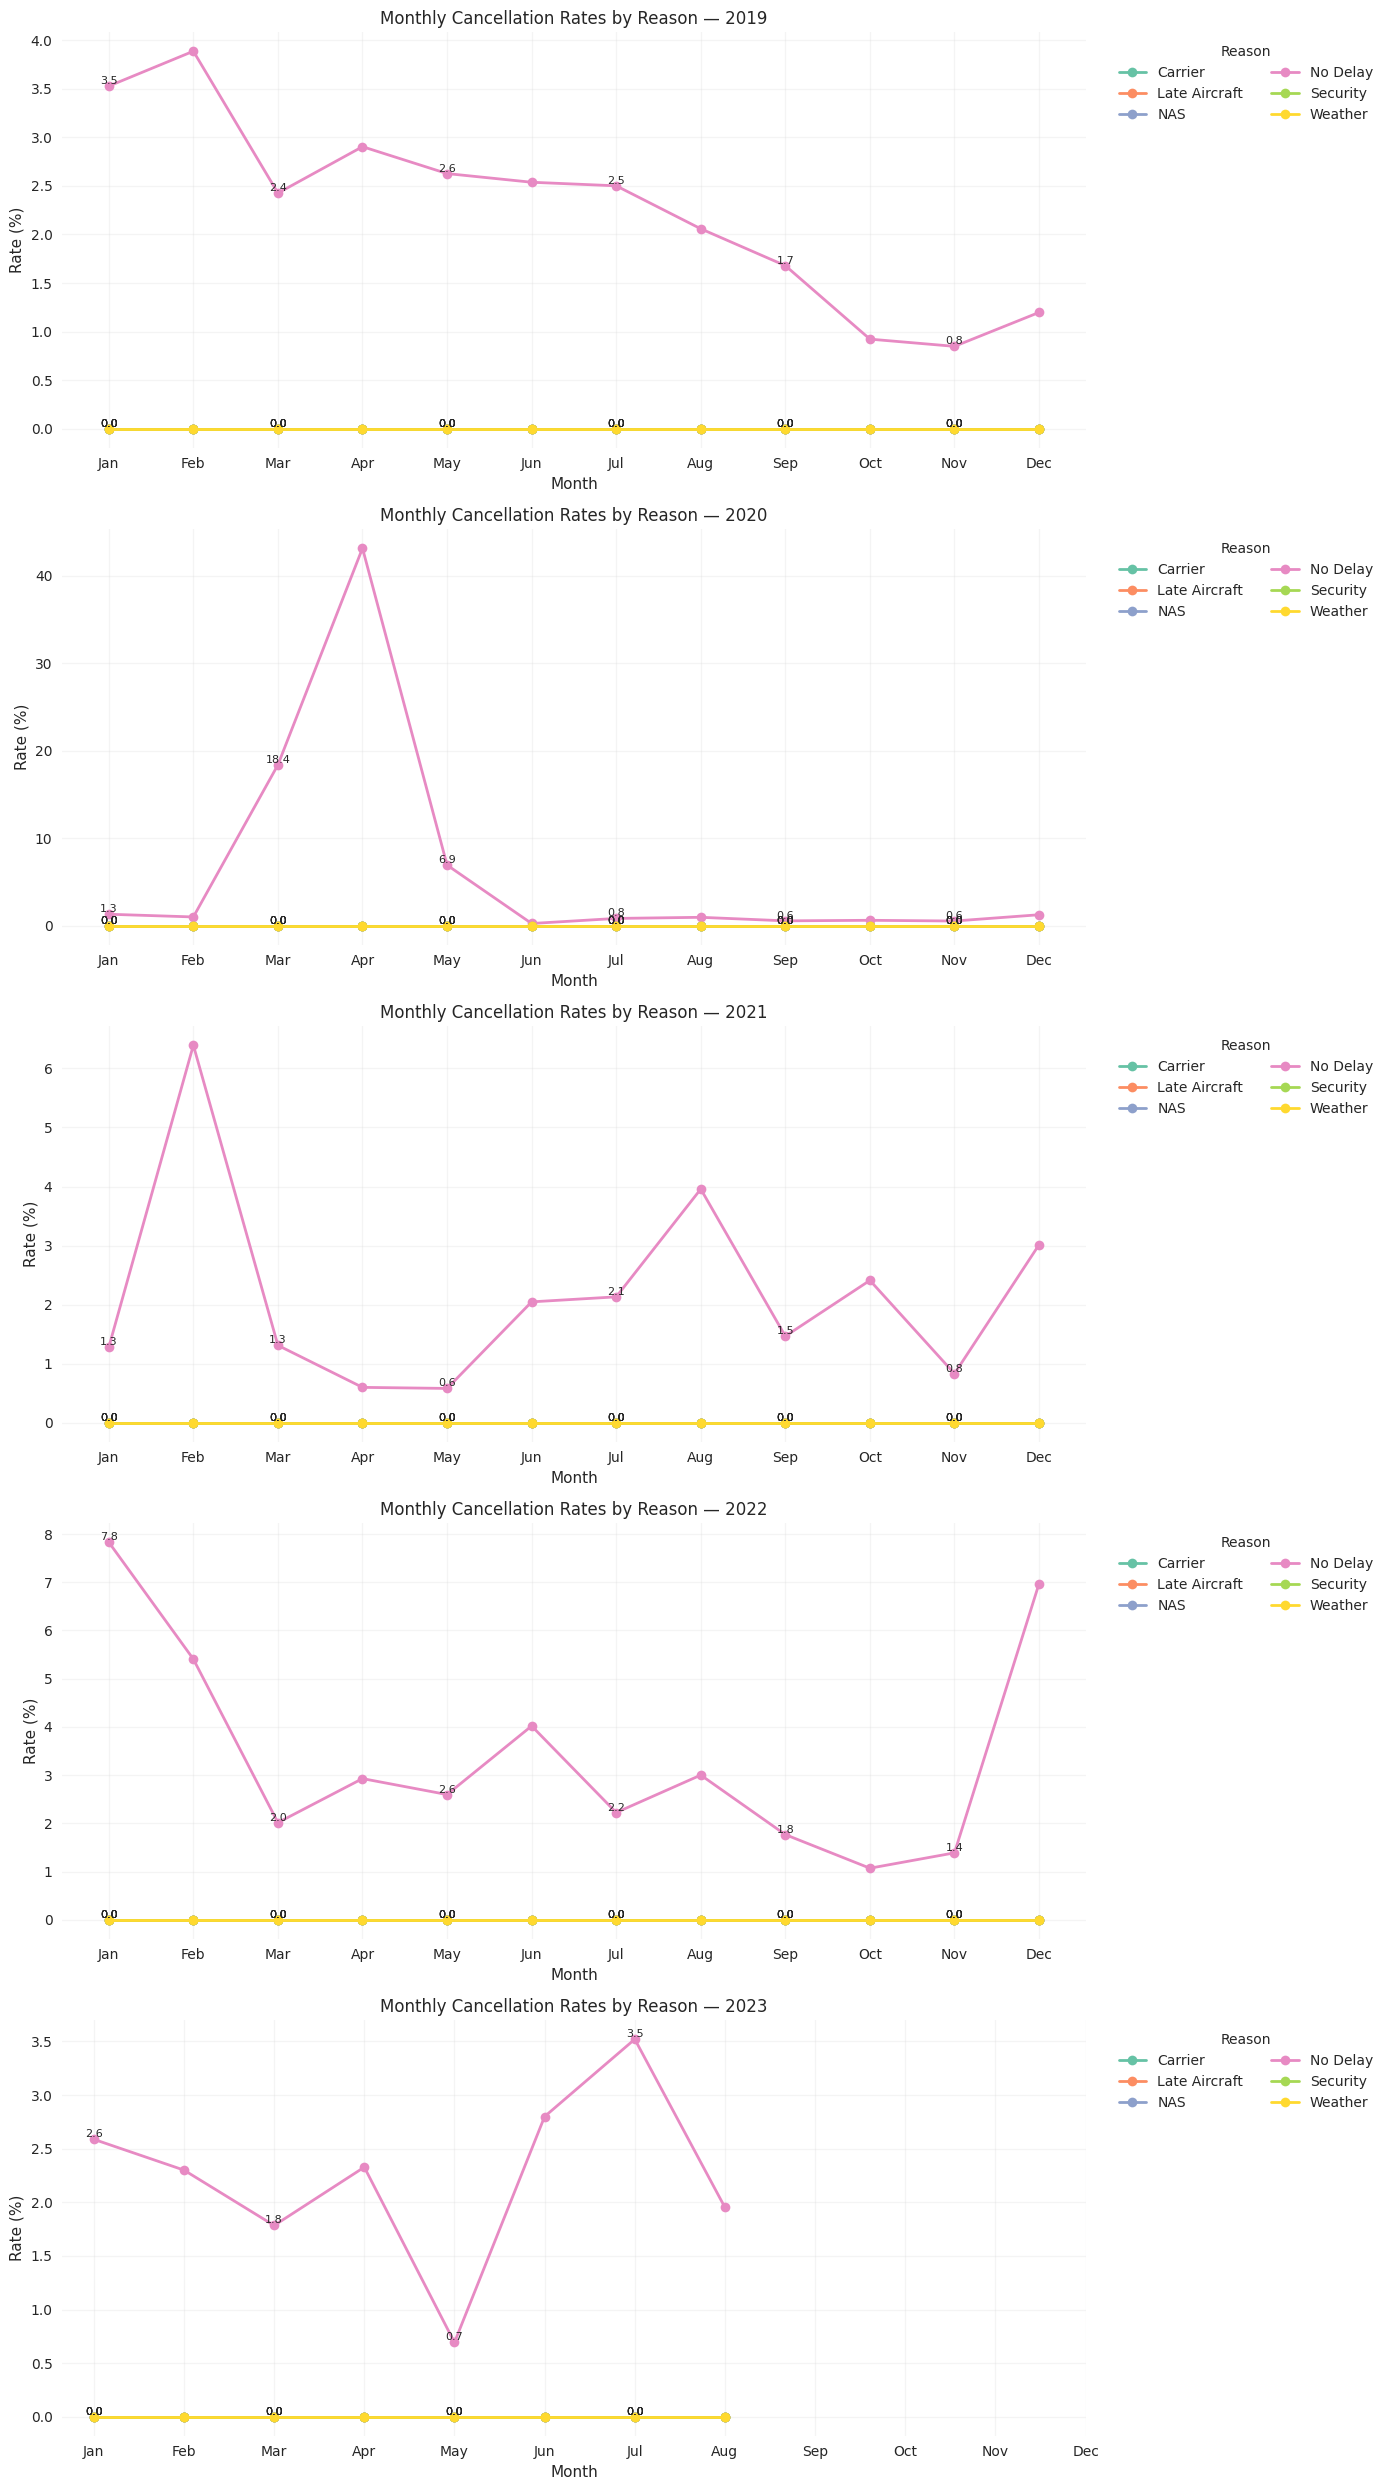

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from calendar import month_abbr

_df = df.copy()

reasons_map = {
    'DELAY_DUE_WEATHER': 'Weather',
    'DELAY_DUE_NAS': 'NAS',
    'DELAY_DUE_SECURITY': 'Security',
    'DELAY_DUE_LATE_AIRCRAFT': 'Late Aircraft',
    'DELAY_DUE_CARRIER': 'Carrier',
    'NoDelay': 'No Delay'
}

_df['Reason'] = _df['DelayReason'].map(reasons_map)
_df['CancelledFlag'] = _df['CANCELLED']

merged = _df.groupby(['Year','Month','Reason'])['CancelledFlag'].mean().reset_index()
merged.rename(columns={'CancelledFlag':'rate'}, inplace=True)

line = merged.groupby(['Year','Month','Reason'])['rate'].sum().reset_index()
line['Perc'] = 100 * line['rate']
years = sorted(line['Year'].unique())

plt.figure(figsize=(14, 5*len(years)))
for idx, yr in enumerate(years, 1):
    ax = plt.subplot(len(years), 1, idx)
    g = line[line['Year']==yr].sort_values(['Month','Reason'])
    for reason, df_r in g.groupby('Reason'):
        plt.plot(df_r['Month'], df_r['Perc'], marker='o', linewidth=2, label=reason)
        for m, v in zip(df_r['Month'][::2], df_r['Perc'][::2]):
            plt.text(m, v, '{:.1f}'.format(v), ha='center', va='bottom', fontsize=8)
    plt.title(f'Monthly Cancellation Rates by Reason — {yr}')
    plt.xlabel('Month')
    plt.ylabel('Rate (%)')
    plt.xticks(range(1,13), [month_abbr[m] for m in range(1,13)])
    plt.legend(title='Reason', ncol=2, bbox_to_anchor=(1.02,1), loc='upper left')
    plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()
